## Importing libraries

In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

## Loading the dataset

In [132]:
dataset=pd.read_csv("diamonds.csv")

## Number of rows and columns

In [133]:
dataset.shape

(53940, 11)

## First 5 records of the dataset

In [134]:
dataset.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## Last 5 records of the dataset

In [135]:
dataset.tail()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,53940,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


## 10 random records from the dataset

In [136]:
dataset.sample(10)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
25110,25111,1.50,Good,E,VS2,63.7,56.0,13653,7.18,7.16,4.57
20352,20353,1.55,Premium,J,VS1,62.6,59.0,8749,7.40,7.35,4.62
45967,45968,0.35,Very Good,J,SI1,63.3,56.0,526,4.53,4.50,2.86
3268,3269,1.01,Premium,I,SI2,61.5,62.0,3360,6.41,6.37,3.93
25223,25224,1.22,Premium,E,VVS1,61.1,60.0,13824,6.87,6.85,4.19
27953,27954,0.27,Ideal,I,VS1,61.9,54.0,432,4.14,4.19,2.58
35935,35936,0.38,Ideal,E,VS1,61.4,56.0,920,4.66,4.69,2.87
20354,20355,1.00,Good,E,VVS2,63.5,55.0,8750,6.31,6.36,4.02
41745,41746,0.52,Good,F,SI1,63.8,56.0,1244,5.07,5.12,3.25
18128,18129,1.41,Very Good,H,SI2,58.5,57.0,7339,7.36,7.44,4.33


In [137]:
dataset.columns

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table',
       'price', 'x', 'y', 'z'],
      dtype='object')

### Dropping the unnamed column

In [138]:
dataset.drop(['Unnamed: 0'], axis=1, inplace=True)
#dataset.drop(dataset.columns[dataset.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
#dataset.reset_index(drop=True, inplace=True)

#### Categorical variables: cut, color,clarity
#### Numerical variables: depth,table,price,x,y,z,carat

## Categorical variables analysis

In [139]:
print(dataset.cut.unique())
dataset.cut.value_counts()

['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']


Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [140]:
print(dataset.color.unique())
dataset.color.value_counts()
#dataset['color'].value_counts()

['E' 'I' 'J' 'H' 'F' 'G' 'D']


G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

In [141]:
print(dataset.clarity.unique())
dataset.clarity.value_counts()

['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']


SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64

## Describing statistical metrics for numerical variables

In [142]:
dataset.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


## Segregating and Dropping 0 values for x,y,z

In [143]:
dt=dataset.loc[(dataset.x==0) | (dataset.y==0) | (dataset.z==0)]
print(dt)
len(dt)

       carat        cut color clarity  depth  table  price     x     y    z
2207    1.00    Premium     G     SI2   59.1   59.0   3142  6.55  6.48  0.0
2314    1.01    Premium     H      I1   58.1   59.0   3167  6.66  6.60  0.0
4791    1.10    Premium     G     SI2   63.0   59.0   3696  6.50  6.47  0.0
5471    1.01    Premium     F     SI2   59.2   58.0   3837  6.50  6.47  0.0
10167   1.50       Good     G      I1   64.0   61.0   4731  7.15  7.04  0.0
11182   1.07      Ideal     F     SI2   61.6   56.0   4954  0.00  6.62  0.0
11963   1.00  Very Good     H     VS2   63.3   53.0   5139  0.00  0.00  0.0
13601   1.15      Ideal     G     VS2   59.2   56.0   5564  6.88  6.83  0.0
15951   1.14       Fair     G     VS1   57.5   67.0   6381  0.00  0.00  0.0
24394   2.18    Premium     H     SI2   59.4   61.0  12631  8.49  8.45  0.0
24520   1.56      Ideal     G     VS2   62.2   54.0  12800  0.00  0.00  0.0
26123   2.25    Premium     I     SI1   61.3   58.0  15397  8.52  8.42  0.0
26243   1.20

20

In [144]:
dataset.loc[(dataset!=0).any(axis=1)]


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


## Information on data columns

In [145]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


## To check for any missing/NULL values

In [146]:
pd.isnull(dataset)
#dataset.isna().sum()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
53935,False,False,False,False,False,False,False,False,False,False
53936,False,False,False,False,False,False,False,False,False,False
53937,False,False,False,False,False,False,False,False,False,False
53938,False,False,False,False,False,False,False,False,False,False


## Vizualizations

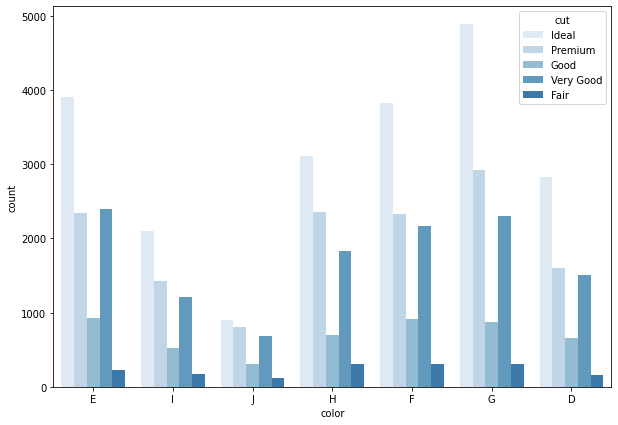

In [147]:
plt.figure(figsize=(10,7))
sb.set_palette("Blues")
#sb.histplot(data=dataset,x=dataset.color,hue='cut')
sb.countplot(data=dataset,x=dataset.color,hue='cut')
plt.show()

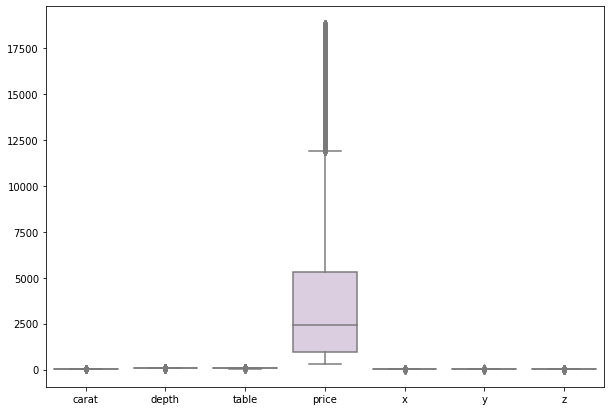

In [148]:
plt.figure(figsize=(10,7))
sb.set_palette("Pastel1")
sb.boxplot(data=dataset)
#sb.catplot(data=dataset, kind='box',aspect=2.5)
plt.show()

## Correlation matrix 

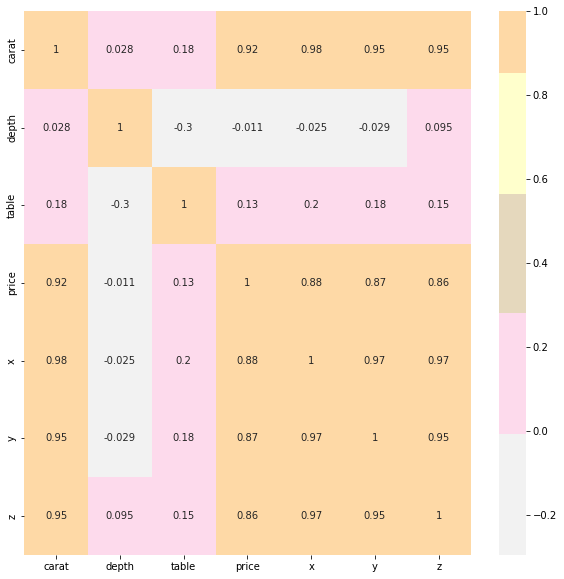

In [149]:
corr=dataset.corr()
plt.figure(figsize=(10,10))
sb.heatmap(corr,annot=True,cmap="Pastel1_r",center=1)
plt.show()

## Relationship between variables
#### carat and x (length) are highly related (0.98)
#### carat and price (0.92)
#### x,y & z dimensions are highly interrelated
#### price and dimensions are correlated



## Strip plot between carat and length (x)

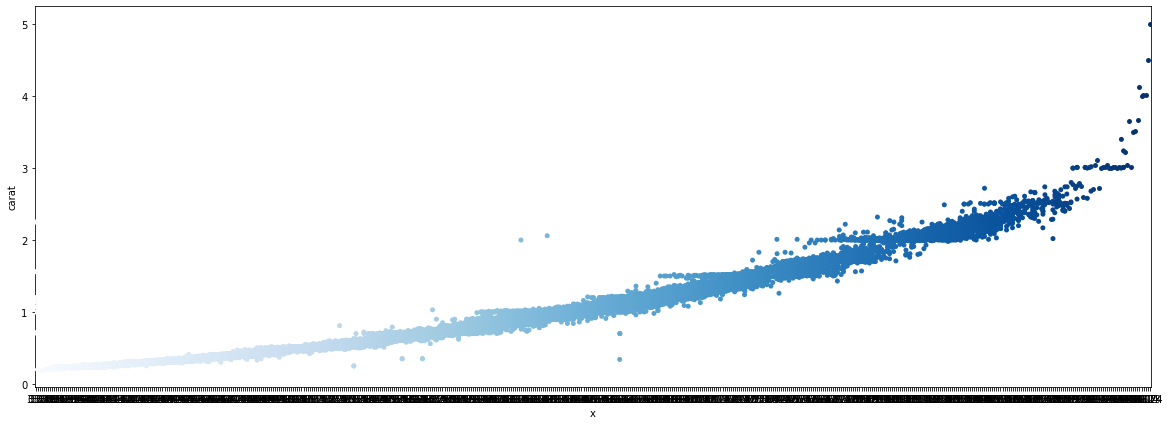

In [150]:
plt.figure(figsize=(20,7))
sb.stripplot(data=dataset, x=dataset.x, y=dataset.carat,palette="Blues")
plt.show()

##  'carat' Density plot 

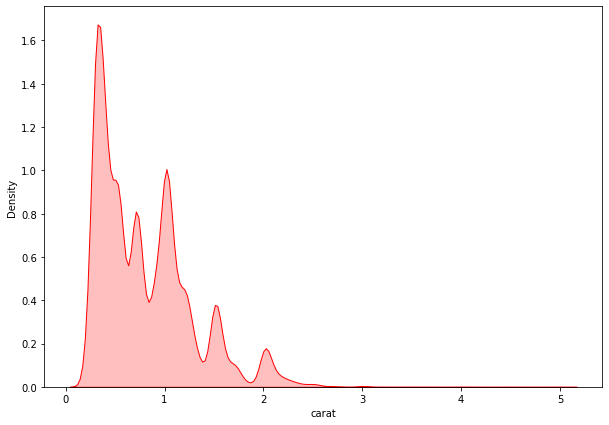

In [151]:
plt.figure(figsize=(10,7))
sb.kdeplot(dataset['carat'], shade=True , color='r')
plt.show()

##  length carat v/s joint plot

<Figure size 720x504 with 0 Axes>

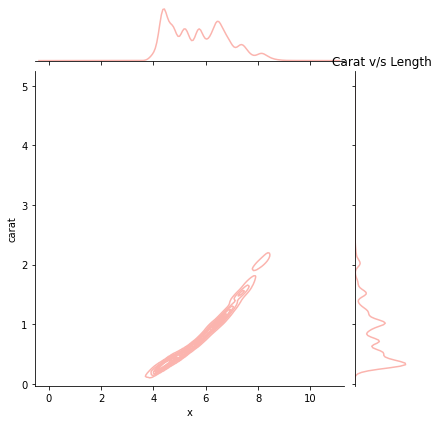

In [152]:
plt.figure(figsize=(10,7))
sb.jointplot(x=dataset.x,y=dataset.carat,kind='kde',palette='dark')
sb.set_palette("bright")
plt.title('Carat v/s Length')
plt.show()

## Scatter plot- Price v/s Carat to show exponential relationship

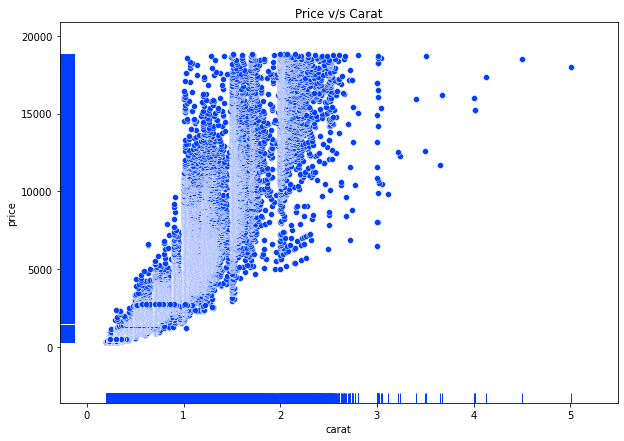

In [170]:
plt.figure(figsize=(10,7))
sb.scatterplot(x=dataset.carat, y=dataset.price, data=dataset,palette='dark')
sb.rugplot(x=dataset.carat, y=dataset.price, data=dataset,palette='dark')
sb.set_palette("bright")
plt.title('Price v/s Carat')
plt.show()

## Box plot- price v/s cut

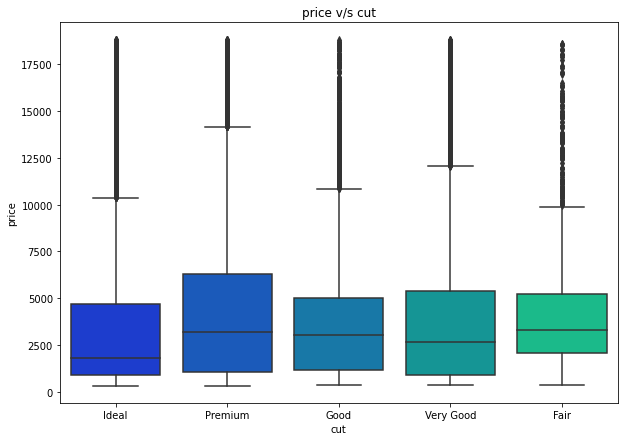

In [171]:
plt.figure(figsize=(10,7))
sb.boxplot(data=dataset,x=dataset.cut,y=dataset.price,palette='winter')
plt.title('price v/s cut')
plt.show()

## Violin plot cut v/s price

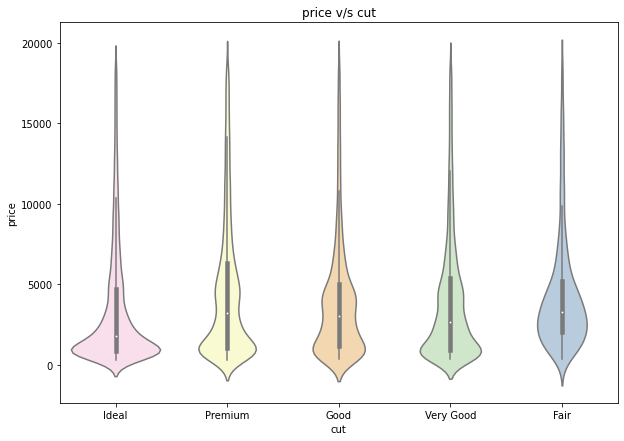

In [172]:
plt.figure(figsize=(10,7))
sb.violinplot(data=dataset,x=dataset.cut,y=dataset.price , palette='Pastel1_r')
plt.title('price v/s cut')
plt.show()

## Box plot- color v/s depth

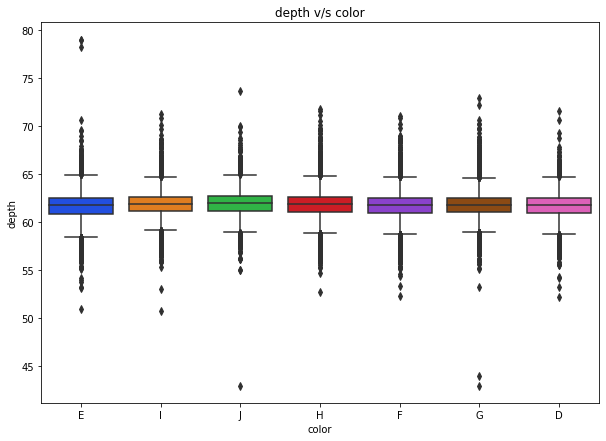

In [173]:
plt.figure(figsize=(10,7))
sb.boxplot(data=dataset,x=dataset.color, y=dataset.depth)
plt.title('depth v/s color')
plt.show()

<AxesSubplot:xlabel='x', ylabel='Density'>

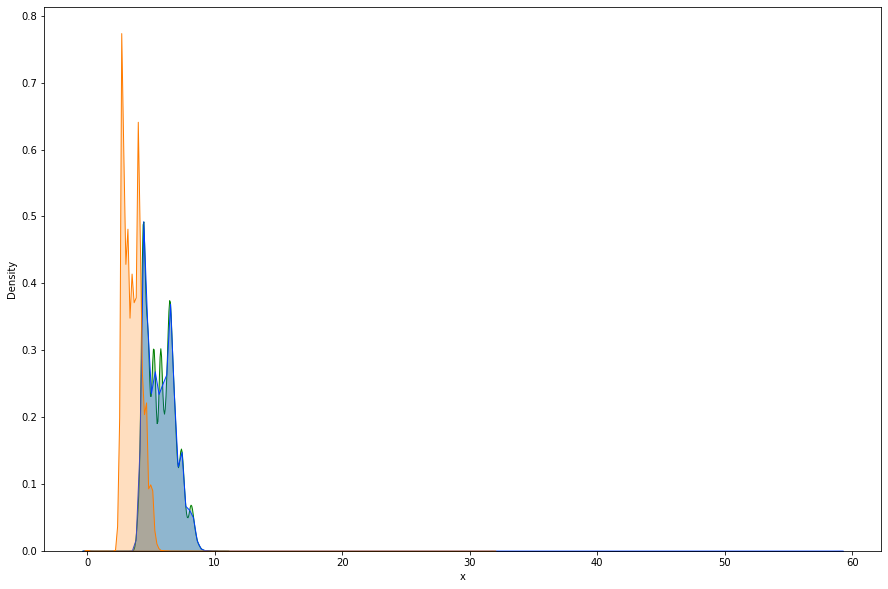

In [157]:
plt.figure(figsize=(15,10))
sb.kdeplot(data=dataset.x,shade=True,color='Green')
sb.kdeplot(data=dataset.y,shade=True,palette='Blue')
sb.kdeplot(data=dataset.z,shade=True,palette='Yellow')

### depth v/s carat bivariate kde plot

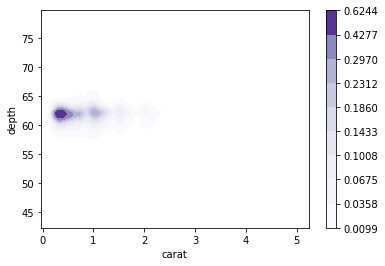

In [158]:
sb.kdeplot(data=dataset, x=dataset['carat'], y=dataset['depth'],shade=True,cmap='Purples',cbar=True)
plt.show()

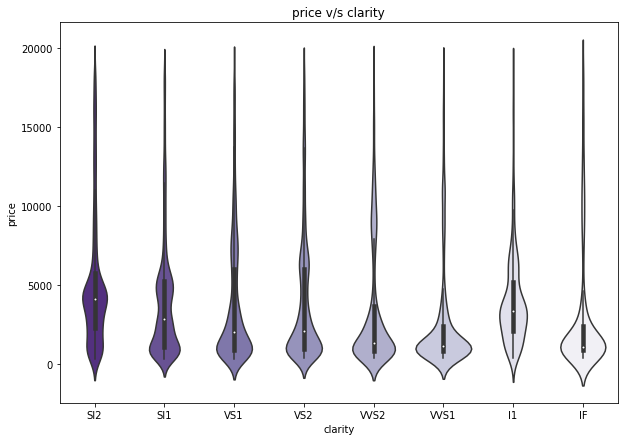

In [176]:
plt.figure(figsize=(10,7))
sb.violinplot(data=dataset,x=dataset.clarity,y=dataset.price , palette='Purples_r')
plt.title('price v/s clarity')
plt.show()

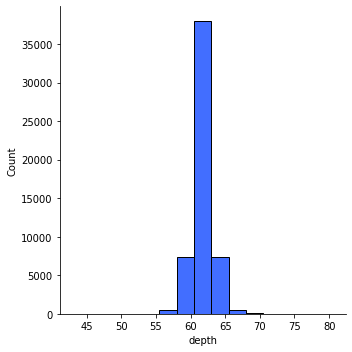

In [159]:
sb.displot(data=dataset, x=dataset.depth,bins=20,binwidth=2.5)

##  Using Groupby function

In [160]:
dataset.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [247]:
grouped=dataset.groupby(['cut','color'])
#grouped.groups()
#print(grouped.groups)
print(grouped.ngroups)
grouped.first()
#grouped.head()


35


carat clarity  depth  table  price     x     y     z  \
cut       color                                                         
Fair      D       0.75     SI2   64.6   57.0   2848  5.74  5.72  3.70   
          E       0.22     VS2   65.1   61.0    337  3.87  3.78  2.49   
          F       0.96     SI2   66.3   62.0   2759  6.27  5.95  4.07   
          G       0.84     SI1   55.1   67.0   2782  6.39  6.20  3.47   
          H       0.91     SI2   64.4   57.0   2763  6.11  6.09  3.93   
          I       0.90     SI1   67.3   59.0   2804  5.93  5.84  3.96   
          J       1.05     SI2   65.8   59.0   2789  6.41  6.27  4.18   
Good      D       0.26     VS2   65.2   56.0    403  3.99  4.02  2.61   
          E       0.23     VS1   56.9   65.0    327  4.05  4.07  2.31   
          F       0.23     VS1   58.2   59.0    402  4.06  4.08  2.37   
          G       0.72     VS2   59.7   60.5   2776  5.80  5.84  3.47   
          H       0.31     SI1   64.0   54.0    402  4.29  4.31  2.75   
          I       0.30     SI2   63.3   56.0    351  4.26  4.30  2.71   
          J       0.31     SI2   63.3   58.0    335  4.34  4.35  2.75   
Ideal     D       0.30     SI1   62.5   57.0    552  4.29  4.32  2.69   
          E       0.23     SI2   61.5   55.0    326  3.95  3.98  2.43   
          F       0.81     SI2   58.8   57.0   2761  6.14  6.11  3.60   
          G       0.23     VS1   61.9   54.0    404  3.93  3.95  2.44   
          H       0.77     VS2   62.0   56.0   2763  5.89  5.86  3.64   
          I       0.30     SI2   62.0   54.0    348  4.31  4.34  2.68   
          J       0.23     VS1   62.8   56.0    340  3.93  3.90  2.46   
Premium   D       0.22     VS2   59.3   62.0    404  3.91  3.88  2.31   
          E       0.21     SI1   59.8   61.0    326  3.89  3.84  2.31   
          F       0.22     SI1   60.4   61.0    342  3.88  3.84  2.33   
          G       0.31     SI1   61.8   58.0    553  4.35  4.32  2.68   
          H       0.30     SI1   62.9   59.0    554  4.28  4.24  2.68   
          I       0.29     VS2   62.4   58.0    334  4.20  4.23  2.63   
          J       0.30     SI2   59.3   61.0    405  4.43  4.38  2.61   
Very Good D       0.23     VS2   60.5   61.0    357  3.96  3.97  2.40   
          E       0.23     VS2   63.8   55.0    352  3.85  3.92  2.48   
          F       0.23     VS1   60.9   57.0    357  3.96  3.99  2.42   
          G       0.23    VVS2   60.4   58.0    354  3.97  4.01  2.41   
          H       0.26     SI1   61.9   55.0    337  4.07  4.11  2.53   
          I       0.24    VVS1   62.3   57.0    336  3.95  3.98  2.47   
          J       0.24    VVS2   62.8   57.0    336  3.94  3.96  2.48   

                    Volume  
cut       color             
Fair      D      40.493787  
          E      12.141738  
          F      50.612485  
          G      45.824820  
          H      48.744969  
          I      45.713184  
          J      55.999042  
Good      D      13.954626  
          E      12.692295  
          F      13.086192  
          G      39.178613  
          H      16.949075  
          I      16.547260  
          J      17.305750  
Ideal     D      16.617744  
          E      12.734010  
          F      45.018480  
          G      12.625780  
          H      41.878685  
          I      16.710157  
          J      12.568140  
Premium   D      11.681516  
          E      11.501952  
          F      11.571712  
          G      16.787520  
          H      16.211499  
          I      15.574860  
          J      16.880958  
Very Good D      12.576960  
          E      12.476053  
          F      12.745656  
          G      12.788826  
          H      14.107027  
          I      12.943623  
          J      12.897984

In [162]:
group=grouped.get_group(('Fair','D'))
group


,carat,cut,color,clarity,depth,table,price,x,y,z
676,0.75,Fair,D,SI2,64.6,57.0,2848,5.74,5.72,3.70
771,0.71,Fair,D,VS2,56.9,65.0,2858,5.89,5.84,3.34
939,0.90,Fair,D,SI2,66.9,57.0,2885,6.02,5.90,3.99
1438,1.00,Fair,D,SI2,69.3,58.0,2974,5.96,5.87,4.10
1554,1.01,Fair,D,SI2,64.6,56.0,3003,6.31,6.24,4.05
...,...,...,...,...,...,...,...,...,...,...
52588,0.73,Fair,D,SI1,64.5,56.0,2539,5.70,5.65,3.66
52676,0.70,Fair,D,SI1,66.2,57.0,2550,5.56,5.41,3.63
52751,0.70,Fair,D,VS2,65.2,59.0,2560,5.58,5.55,3.63
52999,0.71,Fair,D,VS2,64.4,56.0,2596,5.63,5.58,3.61


In [163]:
grouped.depth.max() 

cut        color
Fair       D        71.6
           E        79.0
           F        71.0
           G        72.9
           H        71.8
           I        71.3
           J        73.6
Good       D        67.0
           E        65.9
           F        66.5
           G        65.8
           H        66.1
           I        65.9
           J        66.0
Ideal      D        64.5
           E        65.5
           F        65.3
           G        64.1
           H        65.1
           I        66.7
           J        65.4
Premium    D        63.0
           E        63.0
           F        63.0
           G        63.0
           H        63.0
           I        63.0
           J        63.0
Very Good  D        64.7
           E        64.5
           F        64.5
           G        64.9
           H        64.7
           I        64.4
           J        64.1
Name: depth, dtype: float64

#### Range of depth 

In [164]:
def range_depth(depth):
    r_depth=depth.max() - depth.min()
    return r_depth
        
dataset.groupby('cut').depth.agg(['max','min','median',range_depth])

,max,min,median,range_depth
cut,,,,
Fair,79.0,43.0,65.0,36.0
Good,67.0,54.3,63.4,12.7
Ideal,66.7,43.0,61.8,23.7
Premium,63.0,58.0,61.4,5.0
Very Good,64.9,56.8,62.1,8.1


#### Range of depth using lambda

In [165]:
dataset.groupby('cut').depth.agg([lambda x : max(x)-min(x)])

,<lambda>
cut,
Fair,36.0
Good,12.7
Ideal,23.7
Premium,5.0
Very Good,8.1


### Volume of the diamond

In [244]:
#def volume(x,y,z):
    #vol=(x*y*z)/3
    #return float(vol)
 
#dataset['Volume']= dataset['Volume'].apply(lambda a: (a.x * a.y * a.z)/3)
#dataset['Volume']=dataset.Volume.apply(volume)
#dataset['volume']=dataset.assign(volume=dataset.volume.apply(Volume))
##dataset['Volume']=(dataset.x * dataset.y * dataset.z)/3
dataset.assign(volume=lambda a: (a.x * a.y * a.z)/3)
dataset.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,Volume
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,12.734010
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,11.501952
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,12.692295
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,15.574860
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,17.305750
